In [38]:
import mechanize
from bs4 import BeautifulSoup
import http.cookiejar as cookielib
import pandas
cj = cookielib.CookieJar()
br = mechanize.Browser()
br.set_cookiejar(cj)
br.open("https://op.responsive.net/lt/thraves/entry.html")
br.select_form(nr=0)
br.form['id'] = 'orbitcraft'
br.form['password'] = 'mbauch23'
br.submit()

url_list = ["CASH","JOBIN","JOBQ","S1Q","S2Q","S3Q","S1UTIL","S2UTIL","S3UTIL"]
url_list_4col = ["JOBT","JOBREV","JOBOUT"]

LF_DATA = {}
#get INVENTORY first
inv_url = "http://op.responsive.net/Littlefield/Plot?data=INV&x=all"
soup = BeautifulSoup(br.open(inv_url), "lxml")


In [39]:
data = soup.find_all("script")[6].string
data = data.split("\n")[4].split("'")[3].split()


In [40]:
counter = 1
for i in data:
    if counter % 2 == 1:
        counter += 1
        day = float(i)
        LF_DATA[day] = []
    elif counter % 2 == 0:
        row_data = [float(i)]
        LF_DATA[day].extend(row_data)
        counter += 1

In [42]:
#iterate through and scrape all two-column tables
for url in url_list:
    lf_url = "http://op.responsive.net/Littlefield/Plot?data=%s&x=all" % url
    soup = BeautifulSoup(br.open(lf_url), "lxml")
    data = soup.find_all("script")[6].string
    data = data.split("\n")[4].split("'")[3].split()
    counter = 1
    for i in data:
        if counter % 2 == 0:
            day = counter/2
            LF_DATA[day].append(float(i))
            counter += 1
        else:
            counter +=1

In [43]:
#iterate through and scrape all four-column tables
for url in url_list_4col:
    lf_url = "http://op.responsive.net/Littlefield/Plot?data=%s&x=all" % url
    soup = BeautifulSoup(br.open(lf_url), "lxml")
    data = soup.find_all("script")[6].string
    data0 = data.split("\n")[4].split("'")[5].split()
    data1 = data.split("\n")[5].split("'")[5].split()
    data2 = data.split("\n")[6].split("'")[5].split()

    counter = 1
    for i in data0:
        if counter % 2 == 0:
            day = counter/2
            LF_DATA[day].append(float(i))
            counter += 1
        else:
            counter +=1
    counter = 1
    for i in data1:
        if counter % 2 == 0:
            day = counter/2
            LF_DATA[day].append(float(i))
            counter += 1
        else:
            counter +=1
    counter = 1
    for i in data2:
        if counter % 2 == 0:
            day = counter/2
            LF_DATA[day].append(float(i))
            counter += 1
        else:
            counter +=1

In [44]:
# Add dummy data to fill out fractional day rows
dummy_data = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for key, value in LF_DATA.items():
    if len(value) < 19:
        value.extend(dummy_data)
headers = ["INV","CASH","JOBIN","JOBQ","S1Q","S2Q","S3Q","S1UTIL","S2UTIL","S3UTIL","JOBT0","JOBT1","JOBT2","JOBREV0","JOBREV1","JOBREV2","JOBOUT0","JOBOUT1","JOBOUT2"]
df = pandas.DataFrame.from_dict(LF_DATA, orient="index")
df.columns = headers
df.sort_index(inplace=True)
df["Backlog"] = df["JOBIN"].cumsum() - df["JOBOUT0"].cumsum() - df["JOBOUT1"].cumsum() - df["JOBOUT2"].cumsum()

C:\Users\Sebastian Urzua\AppData\Local\Temp\ipykernel_6364\2508082959.py:13: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


In [50]:
writer = pandas.ExcelWriter('./data.xlsx')
df.to_excel(writer,'data')
writer.close()

In [51]:
df

,INV,CASH,JOBIN,JOBQ,S1Q,S2Q,S3Q,S1UTIL,S2UTIL,S3UTIL,JOBT0,JOBT1,JOBT2,JOBREV0,JOBREV1,JOBREV2,JOBOUT0,JOBOUT1,JOBOUT2,Backlog
1.000,9480.0,1001.011,2.0,0.0,0.000,0.000,0.000,0.367,0.060,0.130,0.279,0.0,0.0,750.0,0.0,0.0,1.0,0.0,0.0,1.0
2.000,9360.0,1002.773,2.0,0.0,1.122,0.000,0.000,0.367,0.256,0.136,0.362,0.0,0.0,750.0,0.0,0.0,2.0,0.0,0.0,1.0
3.000,9120.0,1006.035,4.0,0.0,30.942,4.178,0.000,0.733,0.420,0.200,0.418,0.0,0.0,750.0,0.0,0.0,4.0,0.0,0.0,1.0
4.000,9060.0,1007.048,1.0,0.0,0.000,0.000,0.000,0.183,0.153,0.067,0.738,0.0,0.0,750.0,0.0,0.0,1.0,0.0,0.0,1.0
5.000,9060.0,1008.061,0.0,0.0,0.000,0.000,0.000,0.000,0.164,0.067,0.492,0.0,0.0,750.0,0.0,0.0,1.0,0.0,0.0,0.0
6.000,9060.0,1008.324,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7.000,9000.0,1008.588,1.0,0.0,0.000,0.000,0.000,0.183,0.070,0.067,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8.000,9000.0,1009.601,0.0,0.0,0.000,0.000,0.000,0.000,0.203,0.000,0.523,0.0,0.0,750.0,0.0,0.0,1.0,0.0,0.0,0.0
9.000,8700.0,1011.365,5.0,0.0,23.101,12.588,0.000,0.689,0.372,0.133,0.478,0.0,0.0,750.0,0.0,0.0,2.0,0.0,0.0,3.0
10.000,8640.0,1014.630,1.0,0.0,2.669,12.166,1.060,0.411,0.418,0.267,0.548,0.0,0.0,750.0,0.0,0.0,4.0,0.0,0.0,0.0


In [54]:
import matplotlib.pyplot as plt

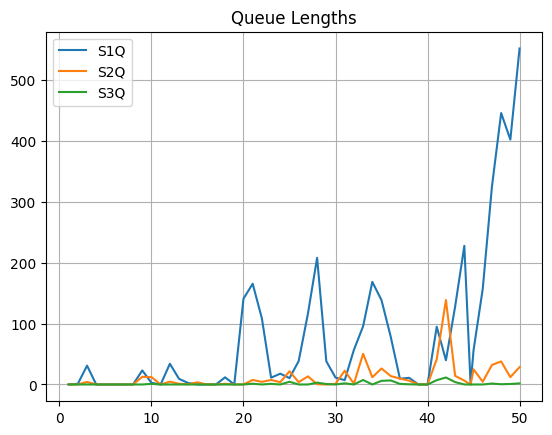

In [56]:
fig, ax = plt.subplots()
df.plot(y=["S1Q","S2Q","S3Q"], title="Queue Lengths", ax = ax)
plt.grid()
plt.show()

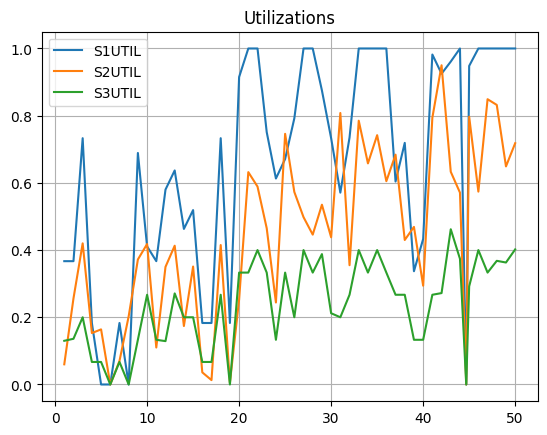

In [57]:
fig, ax = plt.subplots()
df.plot(y=["S1UTIL","S2UTIL","S3UTIL"], title="Utilizations", ax = ax)
plt.grid()
plt.show()